# RNN 变体

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

## 导入数据

In [2]:
num_words = 10000
maxlen = 100

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(25000,)   (25000,)
(25000,)   (25000,)


In [4]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen, padding='post')
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen, padding='post')

In [5]:
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(25000, 100)   (25000,)
(25000, 100)   (25000,)


## LSTM

In [6]:
import tensorflow as tf

def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
#         layers.LSTM(32, return_sequences=True),
        tf.compat.v1.keras.layers.CuDNNLSTM(32, return_sequences=True),
#         layers.LSTM(1, activation='sigmoid', return_sequences=False)
        tf.compat.v1.keras.layers.CuDNNLSTM(1, return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model

model = lstm_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           320000    
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 100, 32)           8448      
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 1)                 140       
Total params: 328,588
Trainable params: 328,588
Non-trainable params: 0
_________________________________________________________________


In [7]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

W0909 23:54:44.544606  8972 deprecation.py:323] From C:\Users\44310\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 6s 266us/sample - loss: 0.5874 - accuracy: 0.7187 - val_loss: 0.4078 - val_accuracy: 0.8188
Epoch 2/10
22500/22500 [==============================] - 4s 181us/sample - loss: 0.3160 - accuracy: 0.8715 - val_loss: 0.3724 - val_accuracy: 0.8408
Epoch 3/10
22500/22500 [==============================] - 4s 181us/sample - loss: 0.2387 - accuracy: 0.9098 - val_loss: 0.3828 - val_accuracy: 0.8356
Epoch 4/10
22500/22500 [==============================] - 4s 181us/sample - loss: 0.2177 - accuracy: 0.9260 - val_loss: 0.4193 - val_accuracy: 0.8324
Epoch 5/10
22500/22500 [==============================] - 4s 181us/sample - loss: 0.1636 - accuracy: 0.9439 - val_loss: 0.4635 - val_accuracy: 0.8236
Epoch 6/10
22500/22500 [==============================] - 4s 181us/sample - loss: 0.1267 - accuracy: 0.9586 - val_loss: 0.5098 - val_accuracy: 0.8276
Epoch 7/10
22500/22500 [===========================

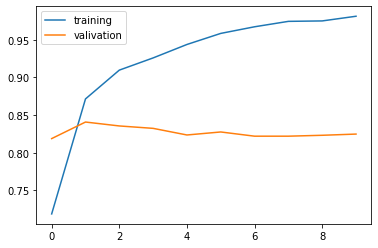

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

## GRU

In [9]:
def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
#         layers.GRU(32, return_sequences=True),
#         layers.GRU(1, activation='sigmoid', return_sequences=False)
        tf.compat.v1.keras.layers.CuDNNGRU(32, return_sequences=True),
        tf.compat.v1.keras.layers.CuDNNGRU(1, return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model

model = lstm_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
cu_dnngru (CuDNNGRU)         (None, 100, 32)           6336      
_________________________________________________________________
cu_dnngru_1 (CuDNNGRU)       (None, 1)                 105       
Total params: 326,441
Trainable params: 326,441
Non-trainable params: 0
_________________________________________________________________


In [10]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 5s 209us/sample - loss: 0.6489 - accuracy: 0.6740 - val_loss: 0.4495 - val_accuracy: 0.8160
Epoch 2/10
22500/22500 [==============================] - 4s 185us/sample - loss: 0.3769 - accuracy: 0.8620 - val_loss: 0.4170 - val_accuracy: 0.8376
Epoch 3/10
22500/22500 [==============================] - 4s 185us/sample - loss: 0.3022 - accuracy: 0.8914 - val_loss: 0.4855 - val_accuracy: 0.8476
Epoch 4/10
22500/22500 [==============================] - 4s 185us/sample - loss: 0.2438 - accuracy: 0.9219 - val_loss: 0.6387 - val_accuracy: 0.8432
Epoch 5/10
22500/22500 [==============================] - 4s 185us/sample - loss: 0.3329 - accuracy: 0.8637 - val_loss: 0.5290 - val_accuracy: 0.7692
Epoch 6/10
22500/22500 [==============================] - 4s 184us/sample - loss: 0.3516 - accuracy: 0.8719 - val_loss: 0.5081 - val_accuracy: 0.8004
Epoch 7/10
22500/22500 [===========================

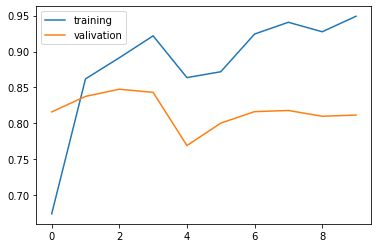

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()